In [18]:
import os
import librosa
from librosa.display import waveplot
import json

In [76]:
DATAPATH = r"E:\Documents\My Projects\Filtr\Data\Reduced_dataset"
JSONPATH = r"E:\Documents\My Projects\Filtr\Data\JSON"
# number of samples per second
SAMPLE_RATE = 44100
# length of each sample
DURATION = 2
# total number of samples for the whole file
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# Load each audio sample (in the reduced set) and plot 

In [5]:
os.listdir(DATAPATH)

['Kick', 'Snare']

In [35]:
sound_data = {
    'filepath':[],
    'data':[],
    'category':[]
    
}
# loop through each folder in the directory
for categ in os.listdir(DATAPATH):
    # create a new path as the DATAPATH + categ
    path = os.path.join(DATAPATH,categ)
    # find all the files in each category
    print(f"{categ}")
    with os.scandir(path) as dir:
        for count, file in enumerate(dir):
            # display the file index and name
            print(f"{count + 1}) {file.name}")
            filename = os.path.join(path,file.name)
            # get the audio data
            data, sr = librosa.load(filename)
            # add the file and the data to a dictionary
            sound_data['filepath'].append(filename)
            sound_data['data'].append(data)
            sound_data['category'].append(categ)
            
            
        print()
    

Kick
1) sampleDK14.wav
2) sampleDK2542.wav
3) sampleDK2541.wav
4) sampleDK2537.wav

Snare
1) !Snare 132.wav
2) 420_V2_Snare_Set_01.wav
3) 808 mafia snare.wav
4) 56445_Surfjira_Snare_HeadShot_Medium.wav



In [36]:
sound_data['category']

['Kick', 'Kick', 'Kick', 'Kick', 'Snare', 'Snare', 'Snare', 'Snare']

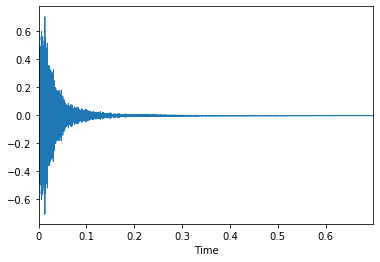

In [34]:
waveplot(sound_data['data'][7]);

In [81]:
def save_MFCC(datapath, jsonpath, n_mfcc = 12, n_fft = 2048, hop_length = 512, num_segments = 1):
    
    data = {
        'mapping':[],
        'mfcc':[],
        'label':[]  
    }
    
    # basically the new sample rate for each segment of the audio file
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    print(f"Number of samples per segment: {num_samples_per_segment}")
    
    expected_mfcc_vec_per_segment = num_samples_per_segment / hop_length
    print(f"Expected number of MFCC vectors per segment: {expected_mfcc_vec_per_segment}")
    
    # loop through each category
    for count, (dirpath, dirnames, filenames) in enumerate(os.walk(datapath)):
        # make sure were in one of the categories instead of the root path
        if dirpath is not datapath:
            # get the class label
            label = os.path.basename(dirpath)
            # add the label to the data dictionary
            data['mapping'].append(label)
            print(f"Processing {label}\n")
            
            # process files for each category
            for file in filenames:
                # get the path to the sample and save it
                filepath = os.path.join(dirpath, file)
                # load the audio data
                audio, sr = librosa.load(filepath)
                #print(f"Working on: {file}")
                
                # process segments extracting mfcc and storing data
                # s is the current segment
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    
                    # get the mfcc per segment
                    mfcc = librosa.feature.mfcc(audio[start_sample:finish_sample],
                                               sr = sr,
                                               n_fft = n_fft,
                                               n_mfcc = n_mfcc,
                                               hop_length = hop_length)
                    
                    mfcc = mfcc.T
                    print(f"Successfully got MFCC for: {file}. MFCC length: {len(mfcc)}")
                    
                    if len(mfcc) == expected_mfcc_vec_per_segment:
                        data['mfcc'].append(mfcc.tolist())
                        # count - 1 to ignore the dataset path
                        data['label'].append(count - 1)
                        print(f"{file} segment: {s}")
                 
    return data
    

In [82]:
save_MFCC(DATAPATH,JSONPATH)

Number of samples per segment: 88200
Expected number of MFCC vectors per segment: 172.265625
Processing Kick

Successfully got MFCC for: sampleDK14.wav. MFCC length: 27
sampleDK14.wav segment: 0
Successfully got MFCC for: sampleDK2542.wav. MFCC length: 21
sampleDK2542.wav segment: 0
Successfully got MFCC for: sampleDK2541.wav. MFCC length: 6
sampleDK2541.wav segment: 0
Successfully got MFCC for: sampleDK2537.wav. MFCC length: 10
sampleDK2537.wav segment: 0
Processing Snare

Successfully got MFCC for: !Snare 132.wav. MFCC length: 16
!Snare 132.wav segment: 0
Successfully got MFCC for: 420_V2_Snare_Set_01.wav. MFCC length: 18
420_V2_Snare_Set_01.wav segment: 0
Successfully got MFCC for: 808 mafia snare.wav. MFCC length: 6
808 mafia snare.wav segment: 0
Successfully got MFCC for: 56445_Surfjira_Snare_HeadShot_Medium.wav. MFCC length: 31
56445_Surfjira_Snare_HeadShot_Medium.wav segment: 0


{'mapping': ['Kick', 'Snare'],
 'mfcc': [[[-65.85016632080078,
    263.43389892578125,
    58.47200393676758,
    7.645958423614502,
    16.99864959716797,
    6.711123943328857,
    7.916543960571289,
    7.861606597900391,
    2.8975210189819336,
    6.562376976013184,
    2.135204792022705,
    -1.8879203796386719],
   [-96.1709213256836,
    251.06170654296875,
    74.01729583740234,
    10.626983642578125,
    19.915241241455078,
    17.098663330078125,
    10.37680435180664,
    10.549148559570312,
    8.988775253295898,
    8.509202003479004,
    6.410479545593262,
    2.9568839073181152],
   [-197.46957397460938,
    180.6226348876953,
    104.13440704345703,
    44.982940673828125,
    26.692346572875977,
    28.14608383178711,
    24.088186264038086,
    14.104175567626953,
    9.652009010314941,
    11.635048866271973,
    12.047996520996094,
    8.398319244384766],
   [-264.4423828125,
    115.91407775878906,
    99.7430648803711,
    77.67784118652344,
    54.9684295654296

(15433,)